# Analysis of super-hero powers & their Correlation

In this notebook, I've analysed how various properties, common to some super-heroes, relate to each other. I've followed the following steps to do so:

1. Load the data and analyse, through simple correlation matrix, which properties might belong together.
2. Categorize them into *four* main classes:

    a. **Strength**
    
    b. **Thermal Capabilities**
    
    c. **Reality Distortion powers**
    
    d. **Vision related powers**
    
3. Segrated Heroes based on each of these categories.
4. Extracted information based common to these heroes along different verticals such as - Gender, Publisher etc.

### Relevant library imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
from matplotlib_venn import venn3, venn3_circles
plt.style.use('seaborn-deep')
import seaborn as sns
sns.set_style("whitegrid")
matplotlib.rc('font', size=20)
matplotlib.rc('axes', titlesize=20)
matplotlib.rc('axes', labelsize=20)
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('legend', fontsize=20)
matplotlib.rc('figure', titlesize=20)
np.random.seed(42)
%matplotlib inline

### Data Loading

Required minor fixes to make both dataframes coherent and mergeable

In [2]:
heroes_info = pd.read_csv("heroes_information.csv")
heroes_info.drop(heroes_info.columns[0], axis=1, inplace=True)
heroes_info = heroes_info.rename(columns={'name':'hero_names'})
heroes_powers = pd.read_csv("super_hero_powers.csv")
heroes_powers.sample(5)

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
660,X-Man,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
158,Claire Bennet,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
634,Venompool,True,True,False,True,False,True,True,False,False,...,True,False,False,True,False,False,False,False,False,False
235,Firestar,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
635,Vertigo II,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


---

## Correlation Heatmap 

To begin with, and capture information related to properties that overlap, I've started with a correlation heatmap based on the correlation matrix (`df.corr()`). Since the number of 'powers' are fairly large, not much information can be interpreted from such a figure.

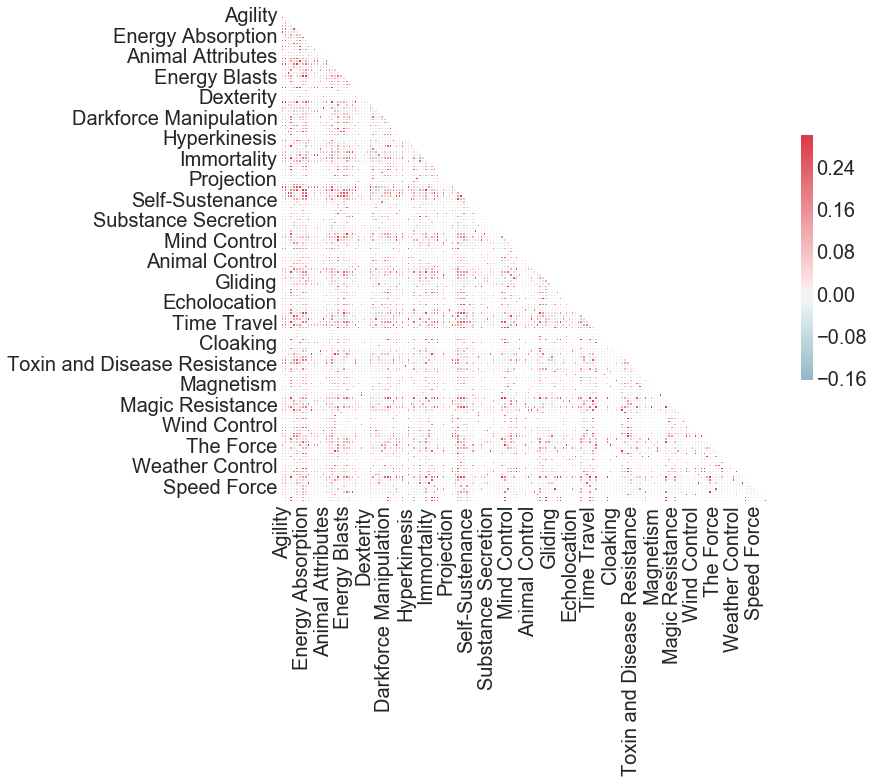

In [3]:
corr = heroes_powers.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Extracting powers with high correlation

Gradually, to find abilities of super heroes that belong together, I extracted property pairs (& merged them) that have correlation value of greater that **0.4**. And then categorized them accordingly.

Results here were fairly predictable -- Vision related skills clubbed together, same with strength etc.

In [4]:
powers = heroes_powers.corr().columns.values
for col, row in ((heroes_powers.corr().abs() > 0.4) & (heroes_powers.corr().abs() < 1)).iteritems():
    if (len(powers[row.values])>0):
        print(col, powers[row.values]) 

Agility ['Stamina' 'Reflexes']
Lantern Power Ring ['Energy Armor']
Dimensional Awareness ['Teleportation' 'Astral Projection' 'Time Manipulation' 'Reality Warping']
Cold Resistance ['Heat Resistance']
Durability ['Super Strength']
Stealth ['Marksmanship' 'Weapons Master']
Danger Sense ['Wallcrawling' 'Web Creation' 'Symbiote Costume']
Underwater breathing ['Water Control' 'Sub-Mariner']
Marksmanship ['Stealth' 'Weapons Master']
Weapons Master ['Stealth' 'Marksmanship']
Animal Attributes ['Animal Oriented Powers']
Super Strength ['Durability' 'Super Speed']
Telepathy ['Telekinesis' 'Astral Projection']
Energy Armor ['Lantern Power Ring']
Energy Blasts ['Force Fields']
Stamina ['Agility' 'Reflexes']
Audio Control ['Sonic Scream']
Super Speed ['Super Strength' 'Reflexes']
Animal Oriented Powers ['Animal Attributes']
Teleportation ['Dimensional Awareness']
Telekinesis ['Telepathy' 'Astral Projection' 'Illusions']
Power Sense ['Projection']
Element Control ['Omnipresent' 'Omniscient']
Phasi

In [5]:
powers_cat = {
    'Vision':['hero_names','Vision - X-Ray','Vision - Telescopic',
               'Vision - Microscopic', 'Vision - Night',
              'Vision - Heat'],
    'Reality Distortion':['hero_names','Reality Warping', 'Dimensional Awareness', 'Omnipotent',
                         'Omnipresent', 'Omniscient', 'Dimensional Awareness', 
                         'Time Manipulation','Dimensional Travel','Shapeshifting'],
    'Strength':['hero_names','Durability','Super Strength','Super Speed','Stamina','Reflexes',
               'Energy Armor','Force Fields'],
    'Thermal':['hero_names','Cold Resistance','Energy Absorption','Heat Resistance',
               'Fire Resistance']
}

In [6]:
#vision = heroes_powers[powers_cat['Vision']]
vision = heroes_powers[(heroes_powers[powers_cat['Vision']] == True).any(axis=1)][powers_cat['Vision']]
vision.sample(5)

,hero_names,Vision - X-Ray,Vision - Telescopic,Vision - Microscopic,Vision - Night,Vision - Heat
601,Thanos,False,False,False,False,True
416,Miss Martian,True,False,False,False,False
302,Hyperion,True,False,True,False,True
61,Batman,False,False,False,True,False
101,Blade,False,True,False,True,False


### Creating separate tables for each category

In [7]:
reality_dis = heroes_powers[(heroes_powers[powers_cat['Reality Distortion']] == True).any(axis=1)][powers_cat['Reality Distortion']]
strength = heroes_powers[(heroes_powers[powers_cat['Strength']] == True).any(axis=1)][powers_cat['Strength']]
thermal = heroes_powers[(heroes_powers[powers_cat['Thermal']] == True).any(axis=1)][powers_cat['Thermal']]

In [8]:
print (vision.shape, reality_dis.shape, strength.shape, thermal.shape)

(67, 6) (107, 10) (488, 8) (131, 5)


In [9]:
vision_heroes = set(list(vision.hero_names))
reality_dist_heroes = set(list(reality_dis.hero_names))
strength_heroes = set(list(strength.hero_names))
thermal_heroes = set(list(thermal.hero_names))

-----

## Overlap among Heroes based on their skillset!

One key thing to see here is that there must be substantial overlap between various heroes in context of their abilities. Some interesting observations to note here are - 

- **Strength** overlaps with almost all super-powers. (Silly!)
- The rest three (**Thermal, Vision & Reality Distortion**) are fairly independent with little overlap. So I thought it'd be interesting to analyse & extract some inferences from each of those. 

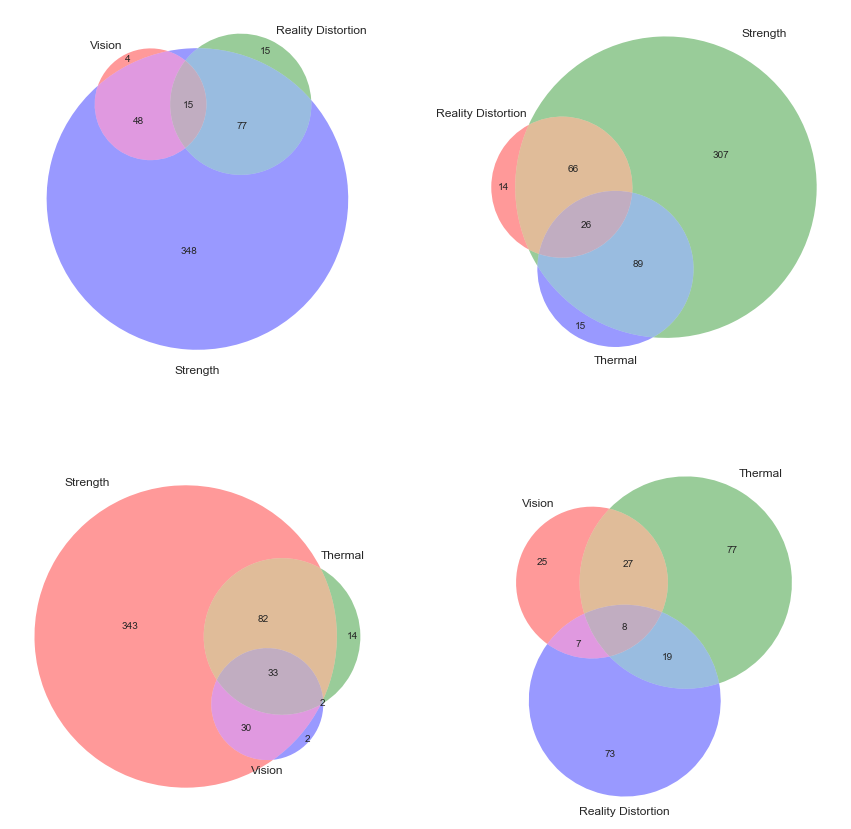

In [19]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(15,15))
venn3([vision_heroes, reality_dist_heroes, strength_heroes], 
      ('Vision', 'Reality Distortion', 'Strength'), ax = ax[0][0])
venn3([reality_dist_heroes, strength_heroes, thermal_heroes], 
      ('Reality Distortion', 'Strength', 'Thermal'), ax = ax[0][1])
venn3([strength_heroes, thermal_heroes, vision_heroes], 
      ('Strength', 'Thermal', 'Vision'), ax = ax[1][0])
venn3([vision_heroes, thermal_heroes, reality_dist_heroes], 
      ('Vision', 'Thermal', 'Reality Distortion'), ax = ax[1][1])

#### Merging various dataframes
After the `merge` operation, I had to clip the value of weight to set the lower limit to 0 instead of -99 in some cases.

In [11]:
thermal_hero_prop = pd.merge(heroes_info, thermal, on='hero_names')
thermal_hero_prop.replace([-99, np.NaN],0, inplace=True)
realDis_hero_prop = pd.merge(heroes_info, reality_dis, on='hero_names')
realDis_hero_prop.replace(-99,0, inplace=True)
vision_hero_prop = pd.merge(heroes_info, vision, on='hero_names')
vision_hero_prop.replace(-99,0, inplace=True)

----

# Thermal Abilities

### Height & Weight distributions of heroes with thermal prowess.

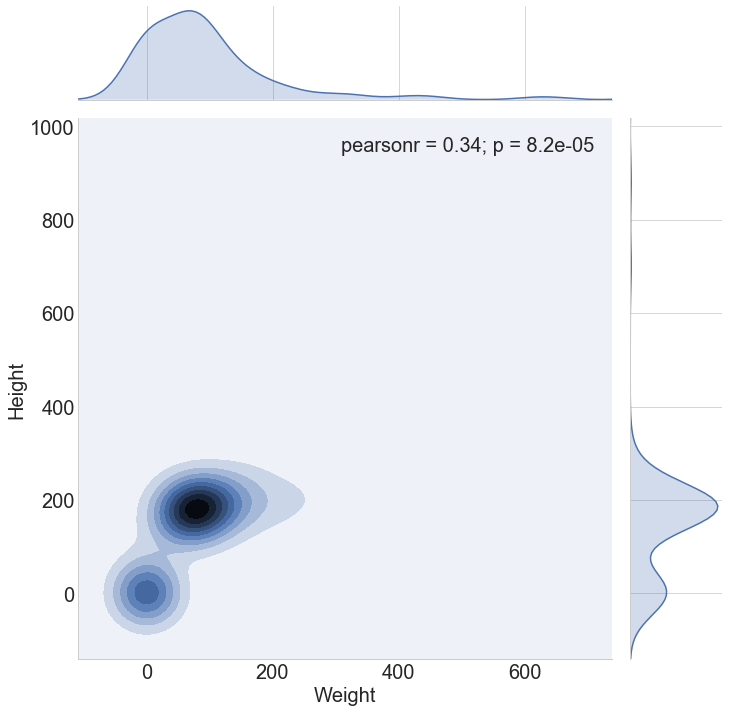

In [12]:
sns.jointplot(thermal_hero_prop.Weight, thermal_hero_prop.Height, 
              data=thermal_hero_prop, kind='kde', size=10)
#plt.title("Height & Weight of heroes with Thermal abilities")

### Other key indicators that define commonalities between these heroes possessing Thermal Abilities.

Text(0.5,0.98,'Characterstics Superheroes with Thermal Abilities')

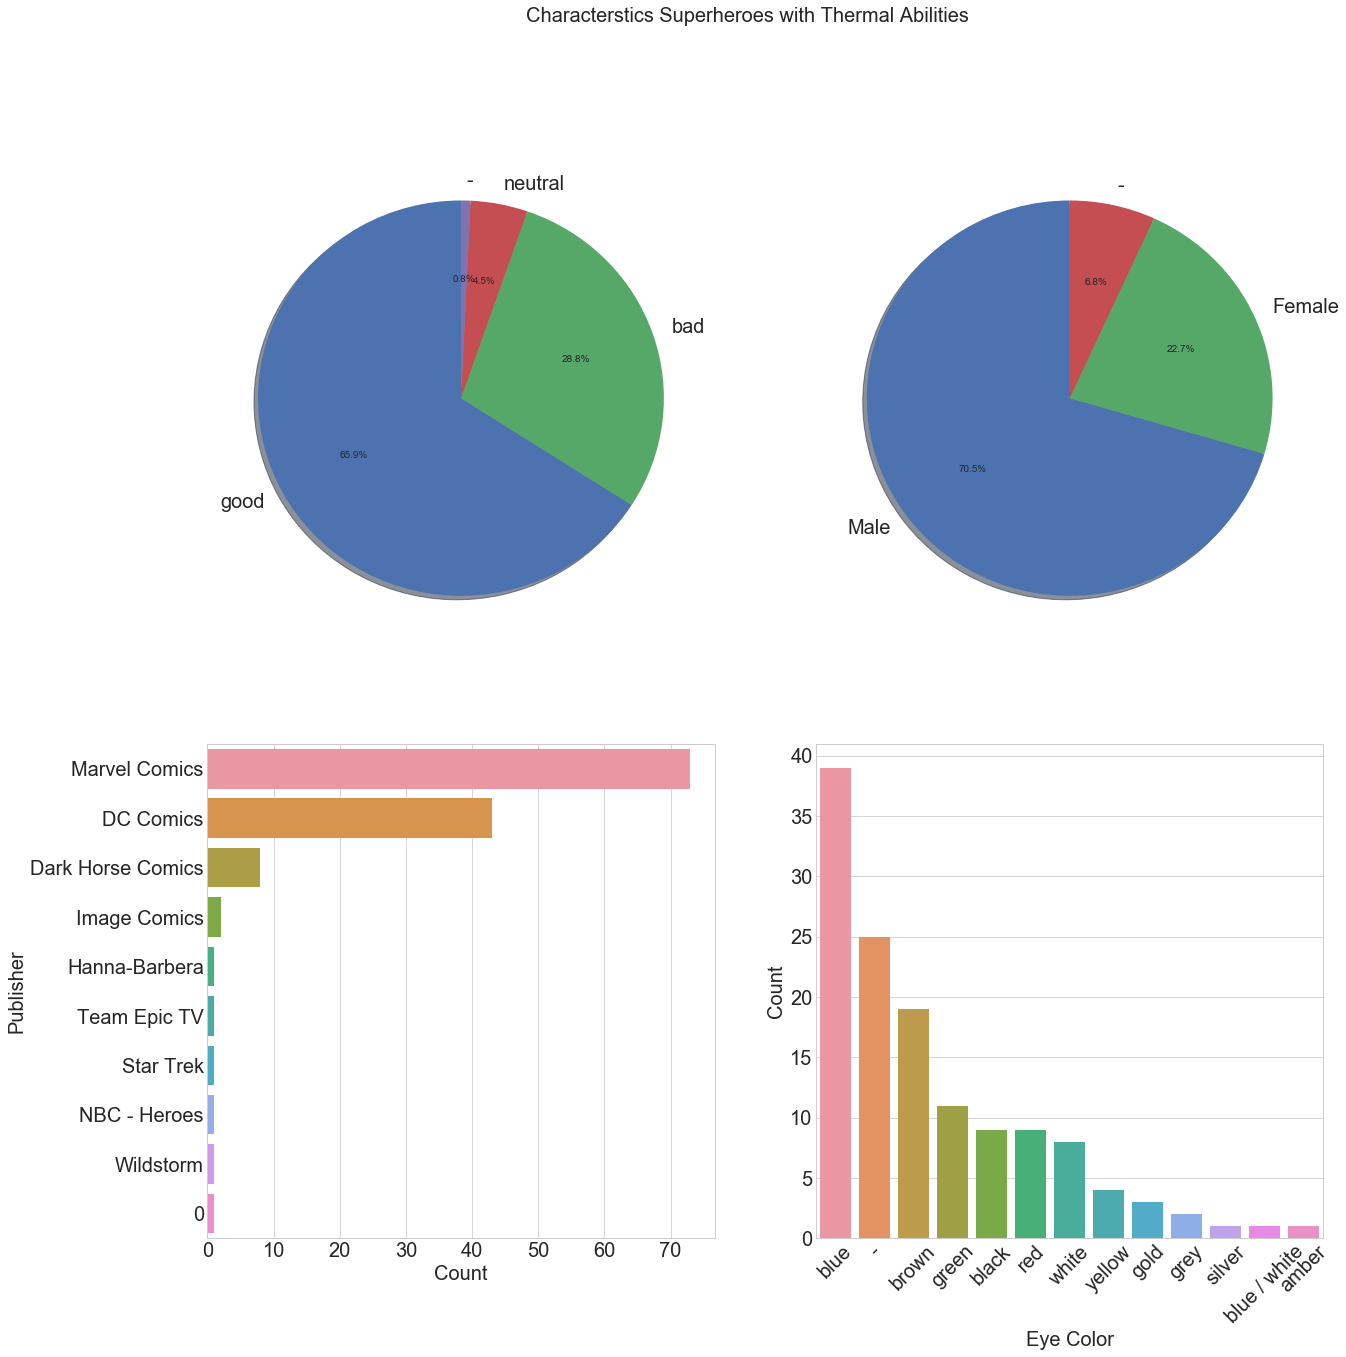

In [13]:
f, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,20))
explode = (0, 0.1, 0, 0)
x = ax[0][0].pie(list(thermal_hero_prop['Alignment'].value_counts()),
             labels=list(thermal_hero_prop['Alignment'].unique()),
             autopct='%1.1f%%', shadow=True, startangle=90)
y = ax[0][1].pie(list(thermal_hero_prop['Gender'].value_counts()),
             labels=list(thermal_hero_prop['Gender'].unique()),
             autopct='%1.1f%%', shadow=True, startangle=90)
sns.barplot(x = 'Publisher', y='index', 
            data=pd.DataFrame(thermal_hero_prop.Publisher.value_counts()).reset_index(), 
            orient='h',ax=ax[1][0])
sns.barplot(x = 'index', y='Eye color', 
            data=pd.DataFrame(thermal_hero_prop['Eye color'].value_counts()).reset_index(), ax=ax[1][1])
ax[1][0].set_ylabel('Publisher')
ax[1][0].set_xlabel('Count')
ax[1][1].set_ylabel('Count')
ax[1][1].set_xlabel('Eye Color')
plt.setp(ax[1][1].get_xticklabels(), rotation=45)

plt.suptitle("Characterstics Superheroes with Thermal Abilities")

### Observations (Thermal Ability)

- Most of the heroes (about *66%*) are **good** in their alignment.
- **Males** dominate this category.
- Most of them come out of **Marvel Studios**.
- Quite a diverse range of eye-colors. (interesting)

-------------------------

# Reality Distortion Powers

### Height & Weight Distros of these folks!

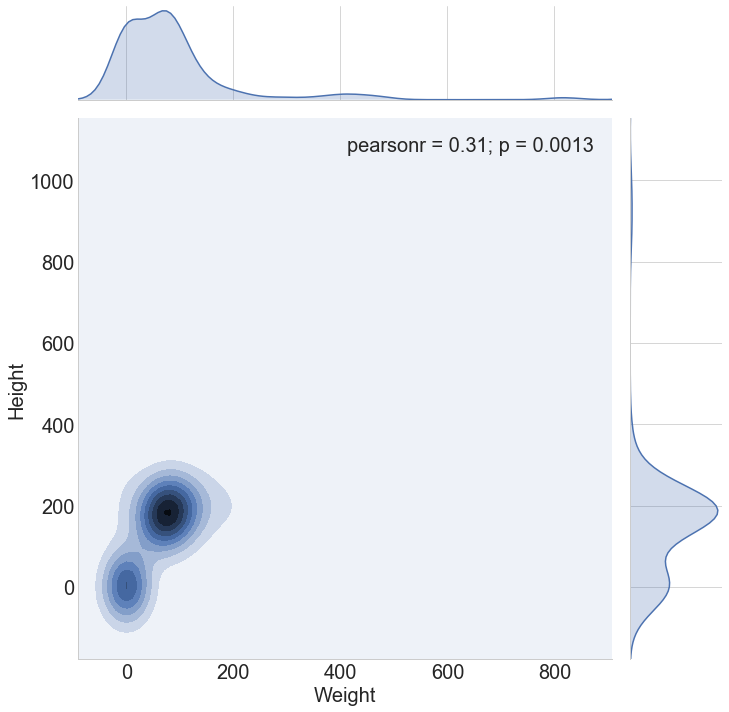

In [14]:
sns.jointplot(realDis_hero_prop.Weight, realDis_hero_prop.Height, 
              data=realDis_hero_prop, kind='kde', size=10)

### Other key indicators that define commonalities between these heroes possessing Reality Distortion Abilities.

Text(0.5,0.98,'Characterstics Superheroes with Reality Distortion Abilities')

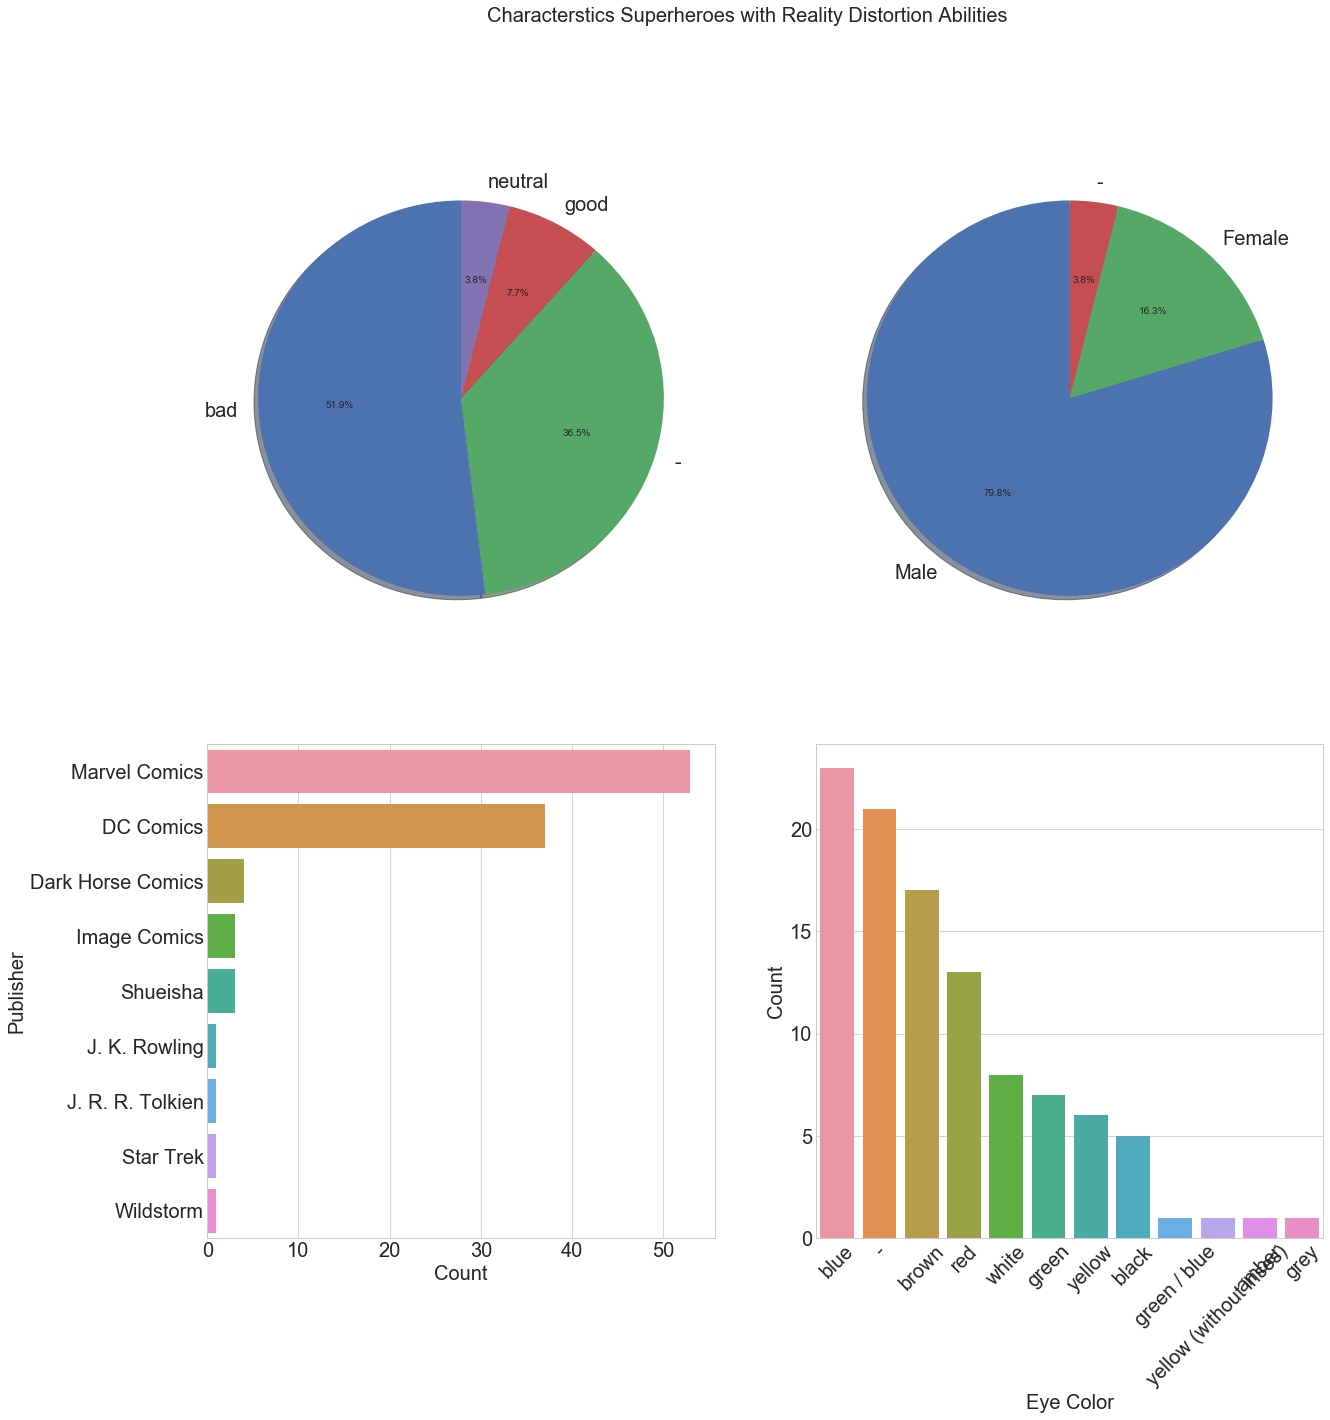

In [15]:
f, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,20))
explode = (0, 0.1, 0, 0)
x = ax[0][0].pie(list(realDis_hero_prop['Alignment'].value_counts()),
             labels=list(realDis_hero_prop['Alignment'].unique()),
             autopct='%1.1f%%', shadow=True, startangle=90)
y = ax[0][1].pie(list(realDis_hero_prop['Gender'].value_counts()),
             labels=list(realDis_hero_prop['Gender'].unique()),
             autopct='%1.1f%%', shadow=True, startangle=90)
sns.barplot(x = 'Publisher', y='index', 
            data=pd.DataFrame(realDis_hero_prop.Publisher.value_counts()).reset_index(), 
            orient='h',ax=ax[1][0])
sns.barplot(x = 'index', y='Eye color', 
            data=pd.DataFrame(realDis_hero_prop['Eye color'].value_counts()).reset_index(), ax=ax[1][1])
ax[1][0].set_ylabel('Publisher')
ax[1][0].set_xlabel('Count')
ax[1][1].set_ylabel('Count')
ax[1][1].set_xlabel('Eye Color')
plt.setp(ax[1][1].get_xticklabels(), rotation=45)

plt.suptitle("Characterstics Superheroes with Reality Distortion Abilities")

### Observations (Reality Distortion Abilities)

- A good chunk of them are visibly **bad** (> *50%*).
- **Males** dominate this category. (Too obvious after last point, eh?)
- Most of them come out of **Marvel Studios** but **DC** isn't very far behind.

------------------------

# Vision Related Capabilities

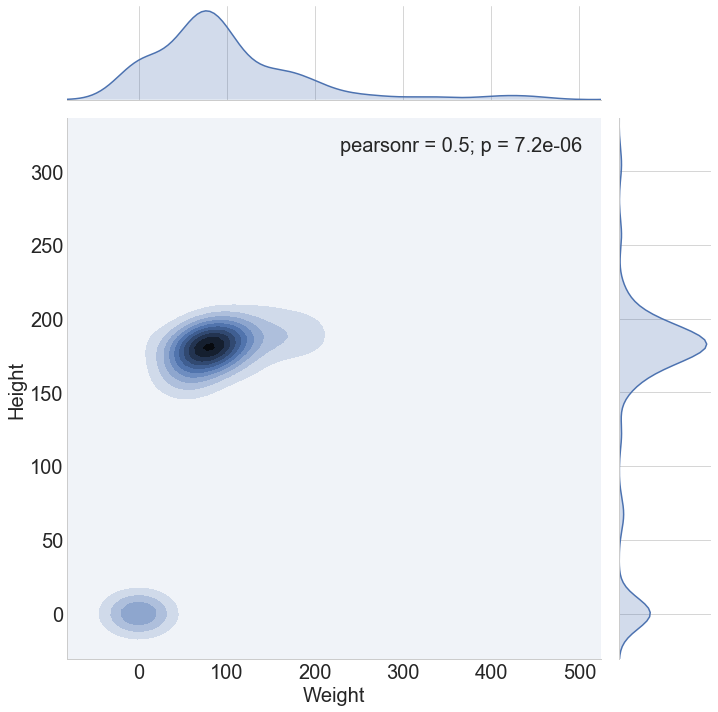

In [16]:
sns.jointplot(vision_hero_prop.Weight, vision_hero_prop.Height, 
              data=realDis_hero_prop, kind='kde', size=10)

Text(0.5,0.98,'Characterstics Superheroes with Vision Related Super Powers')

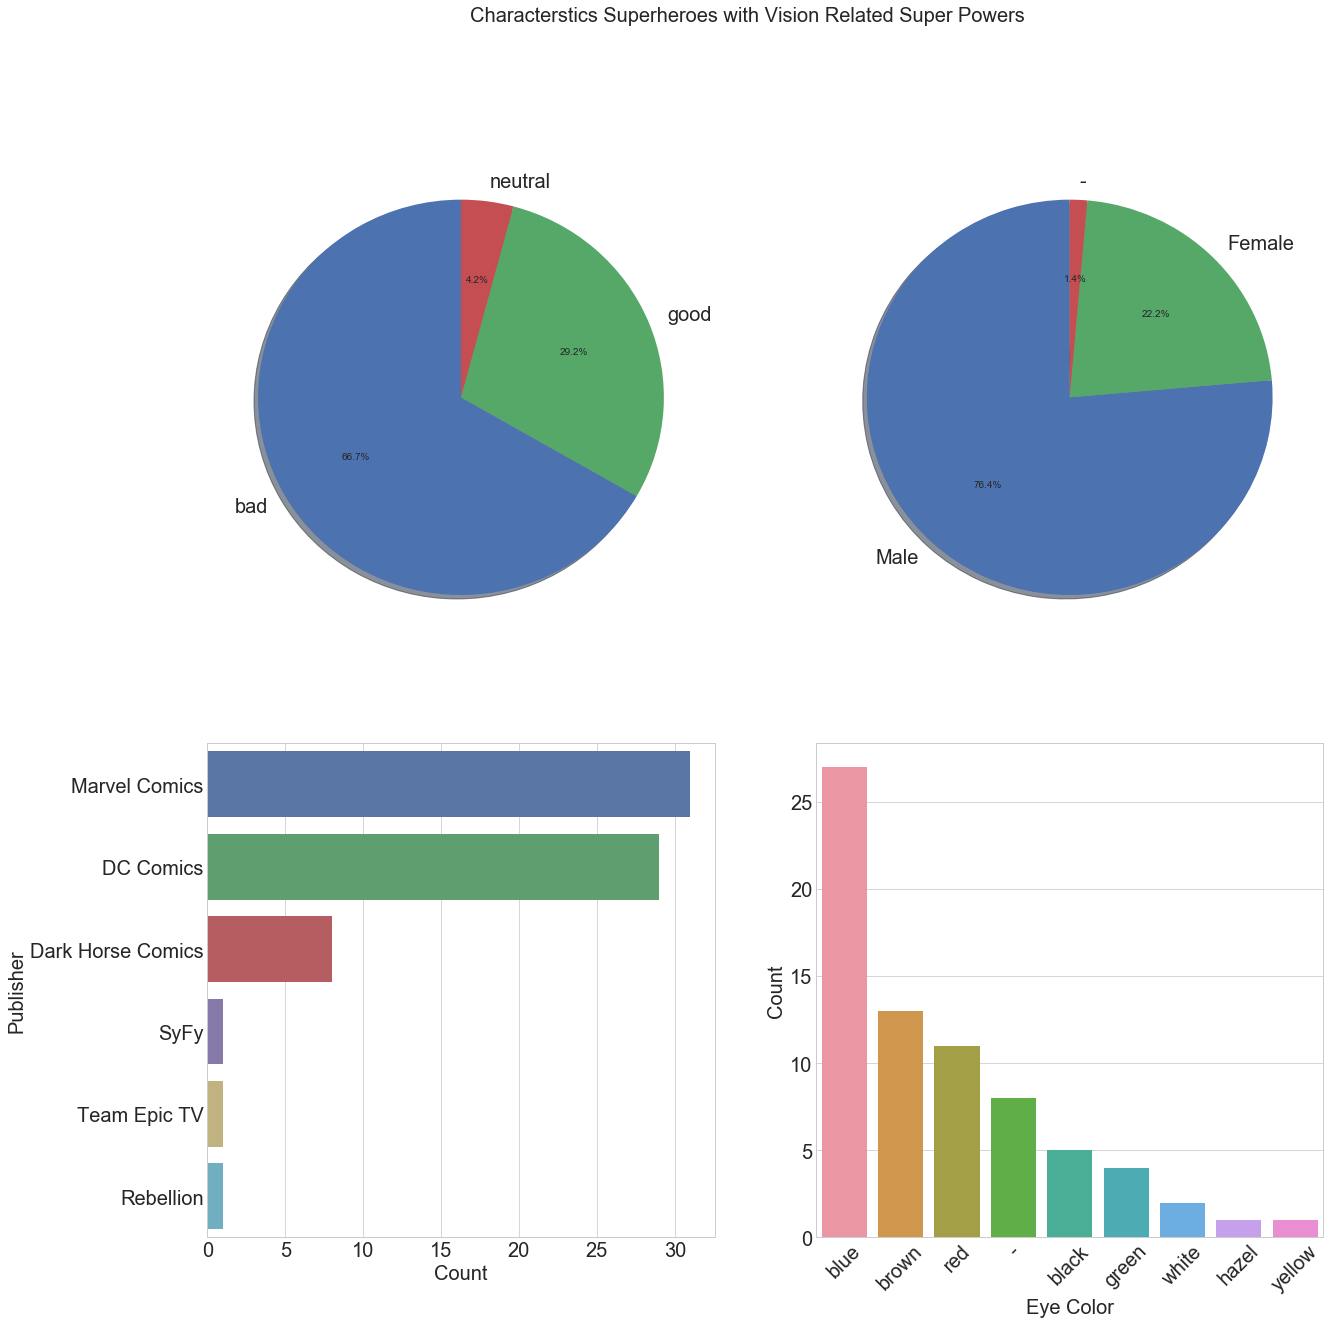

In [17]:
f, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,20))
explode = (0, 0.1, 0, 0)
x = ax[0][0].pie(list(vision_hero_prop['Alignment'].value_counts()),
             labels=list(vision_hero_prop['Alignment'].unique()),
             autopct='%1.1f%%', shadow=True, startangle=90)
y = ax[0][1].pie(list(vision_hero_prop['Gender'].value_counts()),
             labels=list(vision_hero_prop['Gender'].unique()),
             autopct='%1.1f%%', shadow=True, startangle=90)
sns.barplot(x = 'Publisher', y='index', 
            data=pd.DataFrame(vision_hero_prop.Publisher.value_counts()).reset_index(), 
            orient='h',ax=ax[1][0])
sns.barplot(x = 'index', y='Eye color', 
            data=pd.DataFrame(vision_hero_prop['Eye color'].value_counts()).reset_index(), ax=ax[1][1])
ax[1][0].set_ylabel('Publisher')
ax[1][0].set_xlabel('Count')
ax[1][1].set_ylabel('Count')
ax[1][1].set_xlabel('Eye Color')
plt.setp(ax[1][1].get_xticklabels(), rotation=45)

plt.suptitle("Characterstics Superheroes with Vision Related Super Powers")

### Observations (Extraordinary Vision Capabilities)

- Majority are **bad** (2/3).
- About 3/4 are males!
- **Marvel** & **DC** are head to head in this category!

That'd be it for now! I'll try to further incorporate category-wise information on these as I come across them! Ciao!